1. Setup

In [51]:
# install tensorflow
!pip install tensorflow opencv-python matplotlib

In [52]:
# see what versions of software are running
!pip list

Package                      Version
---------------------------- ----------
absl-py                      2.0.0
asttokens                    2.4.1
astunparse                   1.6.3
cachetools                   5.3.2
certifi                      2023.11.17
charset-normalizer           3.3.2
colorama                     0.4.6
comm                         0.2.0
contourpy                    1.2.0
cycler                       0.12.1
debugpy                      1.8.0
decorator                    5.1.1
executing                    2.0.1
flatbuffers                  23.5.26
fonttools                    4.46.0
gast                         0.5.4
google-auth                  2.25.2
google-auth-oauthlib         1.2.0
google-pasta                 0.2.0
grpcio                       1.60.0
h5py                         3.10.0
idna                         3.6
ipykernel                    6.27.1
ipython                      8.18.1
jedi                         0.19.1
jupyter_client               8.6.0


In [53]:
import tensorflow as tf
import os

import cv2          #module that allows to do some computervision
import imghdr       #checks the file extensions for the images

from matplotlib import pyplot as plt        #lets you see pictures directly in output of IDE

import numpy as np

#import some dependencies using tensorflow
from tensorflow.keras.models import Sequential          #API
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten    #architecture
#maxpooling: goes through images and condenses it down (only looks at and returns max value, e.g.)
#Dense: fully connected layer
#Flatten: convolutional layers mainly have channels and flatten reduces these back into a format for dense to be able to use it (so only one output at the end)

#import key metrics for evaluation
from tensorflow.keras.metrics import Precision, Recall, SparseCategoricalAccuracy

In [54]:
#stops tensorflow from taking all of the vRAM on the GPU (uses it all by default)
#helps with "Out Of Memory" (OOM) errors
gpus = tf.config.experimental.list_physical_devices('GPU')  #grab all the GPUs that are available
for gpu in gpus:                                            #limits the memory growth
    tf.config.experimental.set_memory_growth(gpu, True)

In [55]:
# lists all the GPUs that are available to tensorflow
# when "[]" shows up: none are available
tf.config.list_physical_devices('GPU')

[]

2. Remove corrupted images

In [56]:
#variable that holds the path to directory
data_dir = 'dataset'

In [57]:
#shows the files in the main directory
os.listdir(data_dir)

['harryPotter', 'srhTower', 'towerBridge']

In [58]:
#list of extensions
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [59]:
#shows all images
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)

09.jpg
1089423.jpg
11-glenfinnan-viaduct-m-07636688-jpg--84726-.jpg
11ee059eadff971a31b1c8207756b123-1665505676.jpg
181232.jpg
1ad79610-c3f8-48e5-87e0-81d32ef8835e.jpg
1_W6sfYbVzlsfzYs7XPnHLAg.jpg
2-Gelnfinnan.jpg
200.jpg
250px-N2_glenfinnan_viaduct.jpg
29 Glenfinnan Viaduct, Highland, Scotland (c) Jason Hawkes.0f03643af114dd91fae10a4d25092d4d.jpg
2b1e3795-b437-4788-9759-c46f3acd855b.jpg
2L1A1185.jpg
348s.jpg
36900018791_80f9654d6a_o-1.jpg
3867928369_88064442cc_z.jpg
39ee104a469143a536e99990114c7d82.jpg
3a9c9596-0021-48cf-b585-a109cdd6a589.jpg
414a6ce6892040c81064fc4d7b0ea53c-1080x720.jpg
48482877111_5b67f70fda_b.jpg
5355608358_00425751ae_c.jpg
5fad309a652842694e20f3d4_Glenfinnan Viaduct.jpg
5fad31111101090d363788de_visiting the Glenfinnan Viaduct.jpg
6_8_1l.jpg
720p.jpg
76569-jacobite-steam-train-on-glenfinnan-viaduct-shutterstock.jpg
8cf609a3f0d24afdb393573c0956d14f.jpg
9p5lrcq2kg631.jpg
bridge-3732423_1280-1200x900.jpg
Drone-Viaduct.jpg
Glenfinnan+Viaduct+viewpoint.jpg
Glenfinnan+Vi

2.1 Test image visualisation

In [60]:
img = cv2.imread(os.path.join('dataset', 'srhTower', 'DJI_0600.jpg')) #read example image with opencv

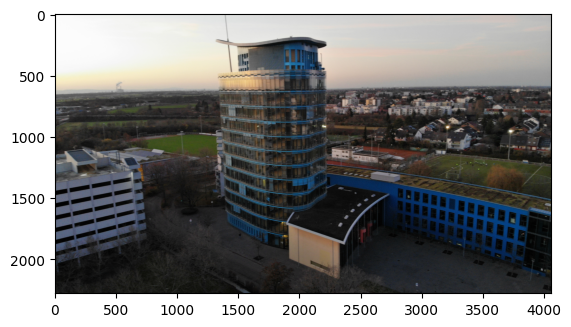

In [61]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))        #last part recolors image through different channel into right color
plt.show()                                              #removes unnecessary line of text above image

2.2 Delete unusable images

In [62]:
#loop through every folder inside the dataset directory (data_dir)
for image_class in os.listdir(data_dir):                            #print out every class inside the directory
    for image in os.listdir(os.path.join(data_dir, image_class)):   #print out every image inside the subdirectories
        image_path = os.path.join(data_dir, image_class, image)     #every image is stored inside the variable image_path
        try:
            img= cv2.imread(image_path)                             #opens up an image using opencv
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)                               #if the image or image extension this will delete the file
        except Exception as e:
            print('Issue with image {}'.format(image_path))        

2.3 Load Data

In [63]:
#shows you what it does (documentation)
#tf.keras.utils.image_dataset_from_directory??

In [64]:
#pull in the image data from your data folder
#is configerable
data = tf.keras.utils.image_dataset_from_directory('dataset') #does a lot of preprocessing (builds classes and labels, resizes images, ...)

Found 254 files belonging to 3 classes.


In [65]:
#accesses the generator from the data pipeline
data_iterator = data.as_numpy_iterator()
#grab one batch
#can be run again to change the batch and therefore the images
batch = data_iterator.next()
batch[0].shape      #shows features of batch

(32, 256, 256, 3)

In [66]:
batch[1]

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 1, 2, 1, 2,
       0, 0, 1, 0, 1, 1, 2, 1, 2, 1])

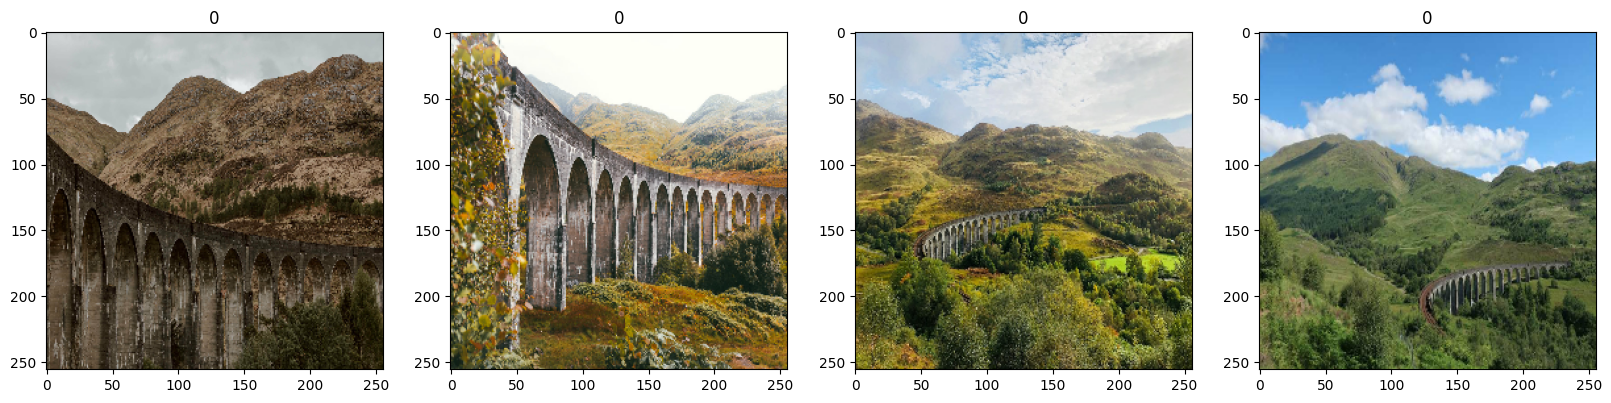

In [67]:
#which number is assigned to which class
# 0 = harryPotter
# 1 = srhTower
# 2 = towerBridge
fig, ax = plt.subplots(ncols=4, figsize=(20,20))        #matplotlib with its subplot function to plot out 4 images
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

3. Preprocess Data

3.1 Scale data

In [68]:
# transformation on data pipeline
#map allows applying a particular type of transformation as the data is being preprocessed through data pipeline 
    #==> speeds up access to data from disk
# x represents the images (independent features)
# y is the target variable
# images are scaled and between 0 and 1
data = data.map(lambda x, y: (x/255, y)) #or call data "scaled" for example, so it is not overwritten twice
#RGB channel values are between 0 to 255

In [69]:
#next batch
#access to iterator and then grabs the next batch
#data.as_numpy_iterator().next()
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()
#use this to check minimum and maximum pixel values
batch[0].min(), batch[0].max()

(0.0, 1.0)

In [70]:
#batch

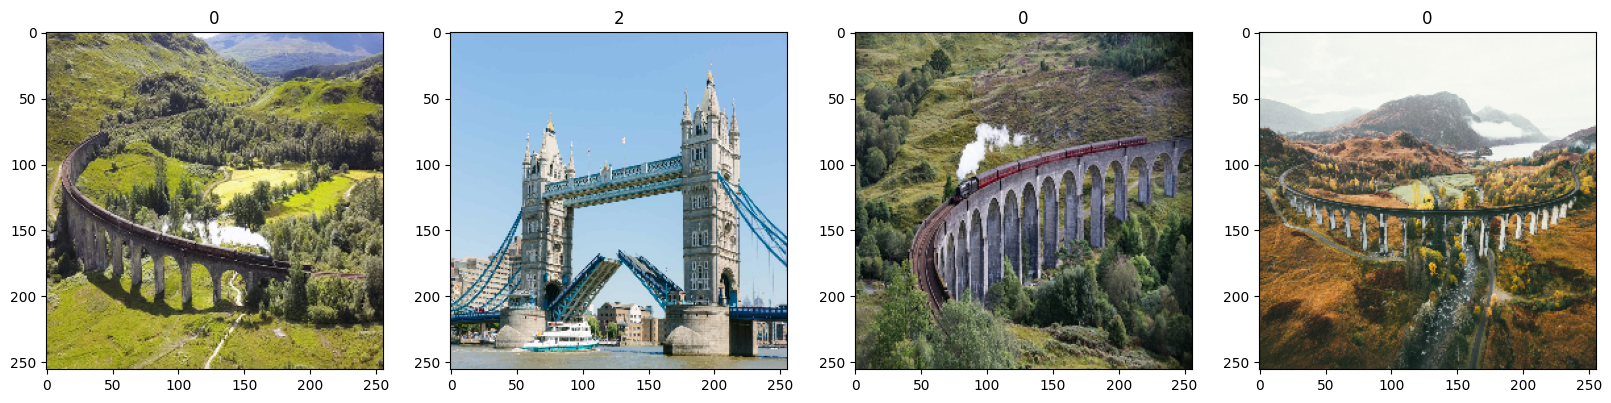

In [71]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))        #matplotlib with its subplot function to plot out 4 images
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)                                 #take out the integer here, otherwise black images (because of division)
    ax[idx].title.set_text(batch[1][idx])

3.2 Split data (Training, Validation, Test)

In [72]:
#batches in total
len(data)

8

In [73]:
#establishing training, validation and testing partitions
train_size = int(len(data)*.7)      #train the Deep Learning Model (during training)
val_size = int(len(data)*.2)+1      #evaluate data while model is training (during training)
test_size = int(len(data)*.1)+1     #post-training to do the evaluation

In [74]:
#check batch amount for data
#val_size

#check if individual batches add up to total batch amount
train_size+val_size+test_size

8

In [75]:
train = data.take(train_size)                           #take defines how much data you are going to take in that particular partition
val = data.skip(train_size).take(val_size)              #skip the batches that are already used for training and take the ones for validation
test = data.skip(train_size+val_size).take(test_size)   #skip the batches that are already used for training snd validation and take the ones for testing

4. Deep Model

4.1 Build Deep Learning Model (DLM)

In [76]:
#create/initialize a model
model = Sequential()

In [77]:
#add in the layers
#3 convolution blocks, 1 flatten layer, 2 dense layers

#adds a convolutional layer and a maxpooling layer
#the first layer needs to have an input or be an input layer
#the convolution has 16 filters (basically scans over image and tries to condense/extract the relevant information to make an output classification)
#filter is 3x3 pixels in size
#moves one pixel each time (=stride of 1)
#changing the filter attributes, changes the performance of the model
#relu activation preserves the positive values (any output that was below 0 is now 0), important for non-linear DLMs
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3))) #number of filters, filter size, filter stride, activation, input
model.add(MaxPooling2D()) #scans maximum value after the relu activation and returns back that value (condenses the information)

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
#by applying convolutional layers, the filters are going to be the last channels

model.add(Flatten()) #flattens the channel values to one single value

model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [78]:
#compile
#uses the adam optimizer
#specify what the loss is (here: binary classification problem)
#accuracy tells how well the model does (0 or 1)
model.compile('adam', loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [79]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

4.2 Train the DLM

In [80]:
logdir='logs'

In [81]:
#create a callback
#logs out the model train as it trains
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir) 

In [82]:
#fit the model
#model.fit is the training component
#takes in the training data
#epochs is how long the model is going to train for (1 epoch = 1 run over the entire training set of data)
#after going through training of the training data, the model will go through the validation data and evaluate it (see how well model is performing in real-time)
#log out all of the information from the model to TensorBoard
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback]) #model.fit is the training component

Epoch 1/20


5/5 [==============================] - 3s 324ms/step - loss: 1.5796 - accuracy: 0.3688 - val_loss: 1.0958 - val_accuracy: 0.5312
Epoch 2/20
5/5 [==============================] - 2s 291ms/step - loss: 1.0830 - accuracy: 0.5125 - val_loss: 1.0521 - val_accuracy: 0.7500
Epoch 3/20
5/5 [==============================] - 2s 292ms/step - loss: 0.9688 - accuracy: 0.6375 - val_loss: 0.6840 - val_accuracy: 0.7344
Epoch 4/20
5/5 [==============================] - 2s 292ms/step - loss: 0.5945 - accuracy: 0.7312 - val_loss: 0.4092 - val_accuracy: 0.8438
Epoch 5/20
5/5 [==============================] - 2s 295ms/step - loss: 0.5096 - accuracy: 0.7875 - val_loss: 0.2072 - val_accuracy: 0.9688
Epoch 6/20
5/5 [==============================] - 2s 294ms/step - loss: 0.3502 - accuracy: 0.8625 - val_loss: 0.2818 - val_accuracy: 0.8906
Epoch 7/20
5/5 [==============================] - 2s 297ms/step - loss: 0.2510 - accuracy: 0.9312 - val_loss: 0.1910 - val_accuracy: 1.0000
Epoch 8/20
5/5 [===============

4.3 Plot out performance

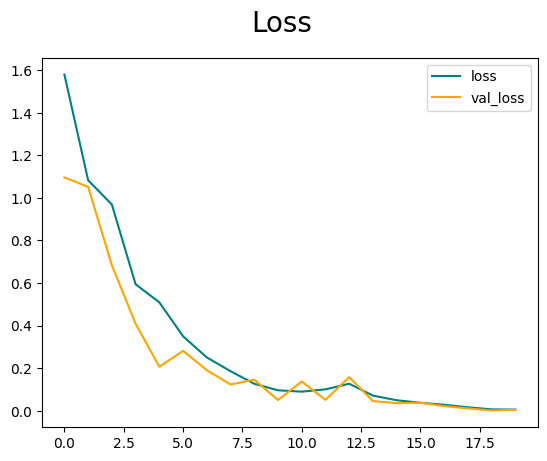

In [83]:
#visualize loss
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')              #training loss
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')    #validation loss
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper right")
plt.show()

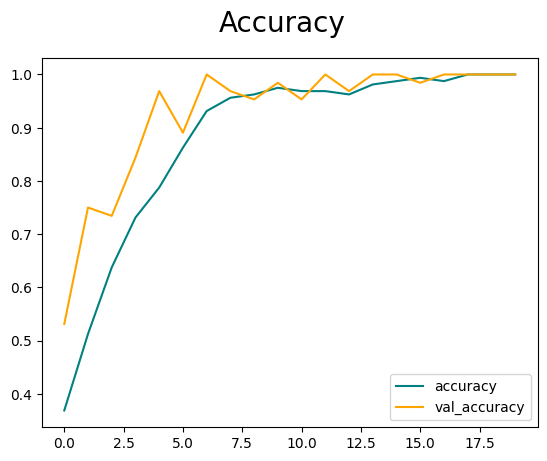

In [84]:
#visualize accuracy
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')              #training accuracy
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')    #validation accuracy
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="lower right")
plt.show()

5. Evaluate Performance

5.1 Test performance with Key Metrics

In [85]:
#this section doesn't work with multiple classes

In [86]:
#establish instances of the key metrics to be able to use them
#precision = Precision()
#recall = Recall()
#accuracy = SparseCategoricalAccuracy()

In [87]:
#loop through each batch in the testing data to test the key metrics out
#for batch in test.as_numpy_iterator():
    #x, y = batch   
    #print(x.shape, y.shape)                 #unpack batch (X = set of images, y = y true value)
    #yhat = model.predict(x)                 #pass image data to model (returns back a set of values (between 0 and 1))
    #precision.update_state(y, yhat)         #update key metrics
    #recall.update_state(y, yhat)
    #accuracy.update_state(y, yhat)

In [88]:
#1.0 in the results means 100% (high performing)
#ignore the other outputs in the results below
#print(precision.result(), recall.result(), accuracy.result())

5.2 Test

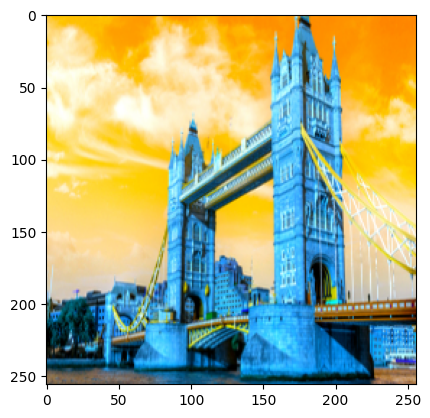

In [89]:
#read in an image that the model has never seen before
img = cv2.imread('towerBridge.jpg')
resize = tf.image.resize(img, (256,256))
#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))   #doesn't work to correct image colors
plt.imshow(resize.numpy().astype(int))
plt.show()

In [90]:
#neural network expects to be passed through a batch of images, not a single one
#solution: put image inside of an array, a list, ...
#image is stored inside of an extra dimension
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [91]:
#prediction
yhat = model.predict(np.expand_dims(resize/255, 0)) #divide by /255 to scale the image

1/1 [==============================] - 0s 49ms/step


In [92]:
yhat

array([[3.5874598e-02, 9.6366030e-01, 4.6514248e-04]], dtype=float32)

In [93]:
max_index=np.argmax(yhat)
if max_index == 0:
    print(f'The predicted class is the Harry Potter Bridge.')
elif max_index == 1:
    print(f'The predicted class is the SRH Tower.')
else:
    print(f'The predicted class is the Tower Bridge.')

The predicted class is the SRH Tower.


6. Saving the DLM

In [94]:
from tensorflow.keras.models import load_model

In [95]:
model.save(os.path.join('models','buildingModel.h5'))

d:\VisualStudioCode\KI\imageclassification\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [96]:
new_model = load_model(os.path.join('models','buildingModel.h5'))

In [97]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 43ms/step


In [98]:
max_indexnew=np.argmax(yhat)
if max_indexnew == 0:
    print(f'The predicted class is the Harry Potter Bridge.')
elif max_indexnew == 1:
    print(f'The predicted class is the SRH Tower.')
else:
    print(f'The predicted class is the Tower Bridge.')  

The predicted class is the SRH Tower.
